# 排列组合

## 排列permutation
$$A_m^n=m*...*(m-n+1)=A_m^{n-1}*(m-n+1)$$

In [1]:
# 递归实现
def A(m, n):
    return 1 if n==0 else A(m, n-1)*(m-n+1)

In [5]:
# 循环实现
def A_loop(m, n):
    r = 1
    for i in range(n):
        r *= m - i
    return r

In [3]:
A(5, 2)

20

In [6]:
A_loop(5, 2)

20

## 组合combination
$$C_m^n=A_m^n/A_n^n=C_m^{n-1}*(m-n+1)/n$$

In [7]:
# 递归实现
def C(m, n):
    return 1 if n==0 else C(m, n-1)*(m-n+1)/n

In [15]:
# 循环实现
def C_loop(m, n):
    r = 1
    for i in range(n):
        r = r*(m-i)/(n-i)
    return r

In [16]:
C(5, 2)

10.0

In [17]:
C_loop(5, 2)

10.0

## 现成的包

In [18]:
from scipy.special import comb, perm

perm(3,2)     #计算排列数    6

6.0

In [19]:
comb(3,2)   #计算组合数     3

3.0

# Python统计学相关知识

https://blog.csdn.net/bxy5511/article/details/81508262

In [3]:
import numpy as np
import pandas as pd
from scipy import stats

In [4]:
house_price_gr = pd.read_csv("house_price_gr.csv",encoding= 'gbk')
house_price_gr.head(2)

,dis_name,rate
0,东城区甘南小区,0.169747
1,东城区察慈小区,0.165484


In [5]:
house_price_gr.shape

(150, 2)

## 均值

In [10]:
np.mean(house_price_gr.rate)

0.11006099670192315

## 方差

In [11]:
house_price_gr.rate.var()

0.0017084240685060587

In [15]:
house_price_gr.rate.var(ddof=0)

0.0016970345747160183

In [14]:
((house_price_gr.rate - house_price_gr.rate.mean())**2).sum()/house_price_gr.rate.shape[0]

0.0016970345747160183

## 点估计

In [6]:
# 进行点估计
np.mean(house_price_gr.rate)

0.11006099670192315

## sem
（全称Standard Error of Mean）中文名标准误，是描述均数抽样分布的离散程度及衡量均数抽样误差大小的尺度。

标准误，即样本均数的标准差

标准误用来衡量抽样误差。标准误越小，表明样本统计量与总体参数的值越接近，样本对总体越有代表性，用样本统计量推断总体参数的可靠度越大。因此，标准误是统计推断可靠性的指标。

摘自：《白话统计》第9章标准误内容  
什么是标准误呢？我们还是从理论上先解释一下，这样更容易理解。  

已知某学校有初三学生共200名，这200名学生的平均身高为160cm.我们以这200名初三学生作为总体，欲通过抽样调查来了解所有初三学生的平均身高。现在假定我们共做了10次抽样，每次抽样量都是100人。此时我们可以分别计算出每次抽样样本的身高均数和标准差。可以得到10个均数和标准差。

这里10个均数和标准差都是样本统计量，如果我们把10个样本的均数作为原始数据，然后计算这10个值的标准差，那么我们得到的指标就是标准误。

也就是说，标准误是样本统计量的标准差，它反映了每次抽样样本之间的差异。如果标准小，则说明多次重复抽样得到的统计量差别不大，提示抽样误差小；反之，如果标准误大，则说明样本统计量之间差别较大，提示抽样误差较大。

不少初学者很容易混淆标准差和标准误，但其实仔细思考一下并不难理解。标准误和标准差的区别主要体现在以下几个方面：

* 第一，标准误的英文是standard Error，是一种误差；而标准差的英文是standard Deviation，只是一种对均数的偏离而已。偏离和误差根本不是一个概念。
* 第二，标准差只是一个描述性指标，只是描述原始数据的波动情况；而标准误是跟统计推断有关的指标。描述性指标和推断性指标根本不是一个层次上的概念。
* 第三，它们针对计算的对象不同。标准差是根据某次抽样的原始数据计算的；而标准误是根据多次抽样的样本统计量（如均数、率等）计算的。理论上，计算标准差只需要一个样本，而计算标准误需要多个样本。

尽管从理论上来讲，标准误的计算是通过多次抽样的多个样本统计量而获得的，但在实际中仅依靠一次抽样来计算标准误也是可行的。事实上，在绝大多数情况下，我们也别无选择，只能利用一次抽样数据来计算标准误。此时标准误的计算公式为：　　$Se=s/sqrt(n) $  （注：公式中分母sqrt(n)，是根号n的意思）

其中，s表示样本标准差，n为样本的例数。不难看出，样本例数越大，标准误越小，即抽样误差越小。

In [8]:
stats.sem(house_price_gr.rate) #样本均值的标准误

0.0033748324091783266

In [9]:
house_price_gr.rate.std()

0.04133308684947277

In [16]:
house_price_gr.rate.std()/np.sqrt(house_price_gr.rate.shape[0])

0.003374832409178327

## 区间估计

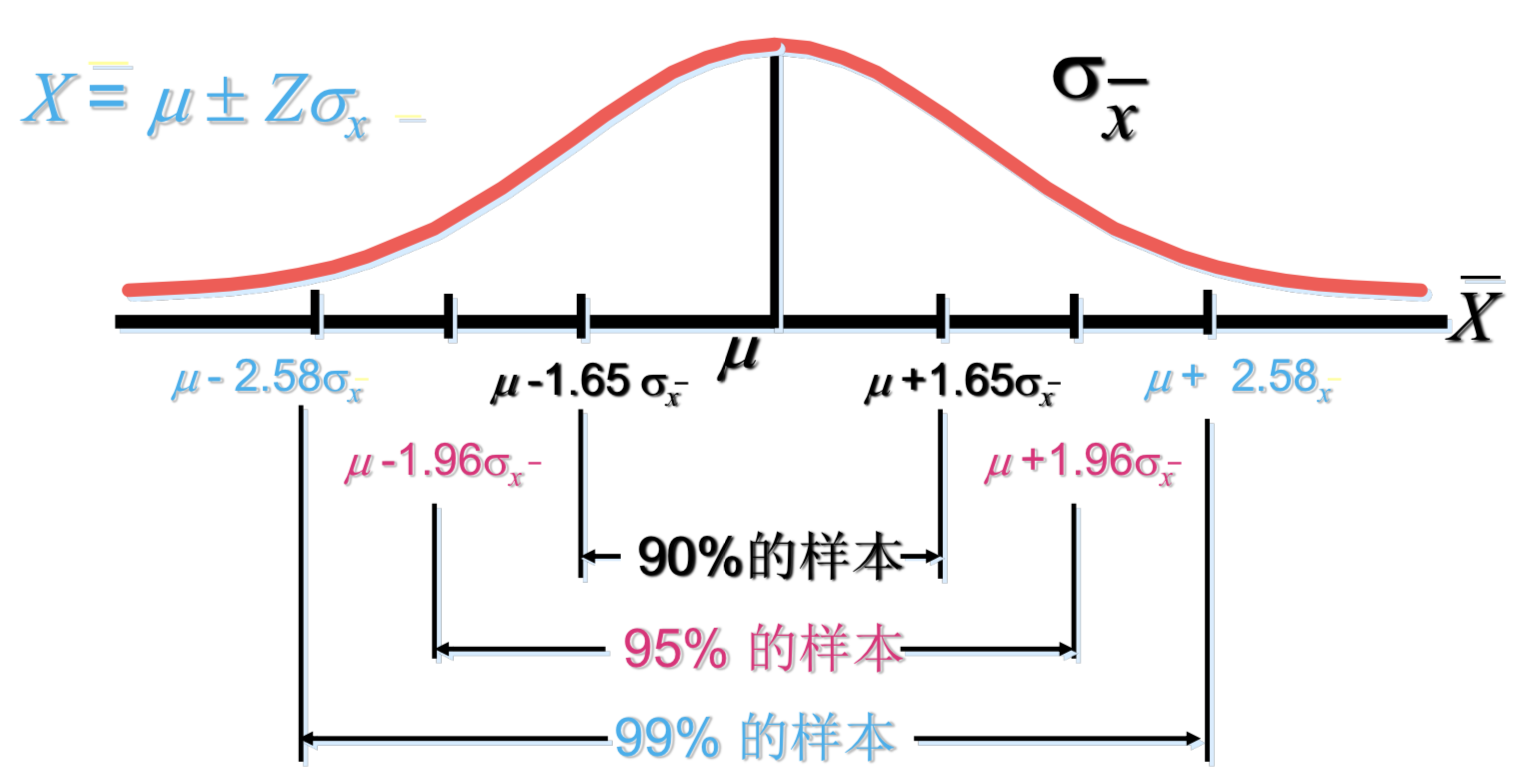

In [27]:
# 进行区间估计
se = stats.sem(house_price_gr.rate)
LB = house_price_gr.rate.mean()  - 1.96*se
UB = house_price_gr.rate.mean()  + 1.96*se
print (LB,UB)

0.10344632517993363 0.11667566822391268


In [28]:
stats.t.interval(0.95, house_price_gr.rate.shape[0]-1, house_price_gr.rate.mean(), stats.sem(house_price_gr.rate))

(0.10339228338892809, 0.11672971001491822)

### 上证指数的收益率

In [9]:
#读取数据
SHindex = pd.read_csv("TRD_Index.csv")
SHindex.head(2)

,Indexcd,Trddt,Daywk,Opnindex,Hiindex,Loindex,Clsindex,Retindex
0,1,2014/1/2,4,2112.126,2113.110,2101.016,2109.387,-0.003115
1,1,2014/1/3,5,2101.542,2102.167,2075.899,2083.136,-0.012445


In [10]:
mu = SHindex.Retindex.mean()
sigma =  SHindex.Retindex.std()
#计算区间
stats.t.interval(0.95,len(SHindex)-1,mu,stats.sem(SHindex.Retindex))

(0.0017279978716816238, 0.0024700651508264178)

# 假设检验

p值：  
P值即概率，反映某一事件发生的可能性大小。统计学根据显著性检验方法所得到的P 值，一般以P < 0.05 为有统计学差异， P<0.01 为有显著统计学差异，P<0.001为有极其显著的统计学差异。其含义是样本间的差异由抽样误差所致的概率小于0.05 、0.01、0.001。

自由度：  
构成样本统计量的独立的样本观测值的数目或自由变动的样本观测值的数目。用df表示。

## t检验
T检验是假设检验的一种，又叫student t检验（Student’s t test），主要用于样本含量较小（例如n<30），总体标准差σ未知的正态分布资料。 

T检验用于检验两个总体的均值差异是否显著。

In [24]:
import statsmodels.api as sm
d1 = sm.stats.DescrStatsW(house_price_gr.rate)
#假设为样本的均值为0.1
print('t检验= %6.4f,p-value=%6.4f, df=%s' % d1.ttest_mean(0.1))

t检验= 2.9812,p-value=0.0034, df=149.0


p值小于0.05，原假设（样本的均值为0.1）被拒绝，

In [25]:
print('t检验= %6.4f,p-value=%6.4f, df=%s' % d1.ttest_mean(0.11))

t检验= 0.0181,p-value=0.9856, df=149.0


## 双样本t检验
双样本t检验在于检验两个样本均值的差异是否显著，在数据分析中，双样本t检验往往用于检验某二分类变 量区分下的连续型变量是否有显著差异。

例如研究信用卡的消费中，男女消费是否有显著差异

In [42]:
#读取数据
# 研究信用卡消费和性别的关系
creditcard_exp  = pd.read_csv('creditcard_exp.csv',skipinitialspace = True)
creditcard_exp  = creditcard_exp.dropna(how = 'any')
creditcard_exp['avg_exp'].groupby(creditcard_exp['gender']).describe().T


#先进性方差齐性检验
gender0 = creditcard_exp[creditcard_exp['gender'] ==0]['avg_exp']
gender1 = creditcard_exp[creditcard_exp['gender'] ==1]['avg_exp']
leveneTestRes = stats.levene(gender0,gender1,center='median')
print('w-value=%6.4f,p-value=%6.4f' % leveneTestRes)

#进行双样本t检验
stats.stats.ttest_ind(gender0, gender1,equal_var=True)

w-value=0.0683,p-value=0.7946


Ttest_indResult(statistic=-1.742901386808629, pvalue=0.08587122878448449)

## 方差分析
方差分析用于检验多个样本的均值是否有显著性差异，所以其用于分析多于两个分类的分类变量与连续 变量的关系，例如不同教育程度的人收入水平是否有显著影响。

单因素方差分析   
衡量不同因素对观测变量的影响程度，在数据分析中，不同因素可以理解为一个变量取不同值时对观测
变量的影响，例如收入水平是否受教育程度的影响，不同行业的股票收益率是否有显著差异 
多因素方差分析  
  考虑的是多个分类变量对连续变量的影响，以及分类变量之间的交互效应，例如在考虑股票收益率与行
业和地区的关系时，还要考虑行业和地区的交互效应。

### 单因素方差分析

In [12]:
# 研究不同行业股票收益率水平
from statsmodels.stats.anova import anova_lm
from statsmodels.formula.api import ols
year_return = pd.read_csv('TRD_Year.csv',encoding= 'gbk')
model = ols('Return ~Industry',data =year_return.dropna()).fit()
print(anova_lm(model))

              df      sum_sq   mean_sq         F        PR(>F)
Industry    74.0   60.517228  0.817800  4.177614  4.382045e-28
Residual  2302.0  450.634318  0.195758       NaN           NaN


### 多因素方差分析

In [13]:
creditcard_exp  = pd.read_csv('creditcard_exp.csv',skipinitialspace = True)
ana = ols('avg_exp ~ C(edu_class) + C (gender)', data = creditcard_exp).fit()
anova_lm(ana)
ana.summary()
#添加交互项

ana1 = ols('avg_exp ~ C(edu_class) + C (gender) + C(edu_class)*C(gender)', data = creditcard_exp).fit()
anova_lm(ana1)
ana1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                avg_exp   R-squared:                       0.633
Model:                            OLS   Adj. R-squared:                  0.598
Method:                 Least Squares   F-statistic:                     18.12
Date:                Mon, 09 Sep 2019   Prob (F-statistic):           4.35e-12
Time:                        20:09:40   Log-Likelihood:                -490.80
No. Observations:                  70   AIC:                             995.6
Df Residuals:                      63   BIC:                             1011.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercept                          207.3700    200.057      1.037      0.304    -192.412     607.152
C(edu_class)[T.1]                  417.8090    209.367      1.996      0.050      -0.577     836.195
C(edu_class)[T.2]                  732.2613    212.977      3.438      0.001     306.661    1157.861
C(edu_class)[T.3]                 1346.5708    216.086      6.232      0.000     914.757    1778.384
C(gender)[T.1]                      -0.0168     67.939     -0.000      1.000    -135.782     135.749
C(edu_class)[T.1]:C(gender)[T.1]   192.7428    162.889      1.183      0.241    -132.765     518.251
C(edu_class)[T.2]:C(gender)[T.1]    96.8755    110.846      0.874      0.385    -124.632     318.383
C(edu_class)[T.3]:C(gender)[T.1]  -289.6350    109.331     -2.649      0.010    -508.115     -71.155
==============================================================================
Omnibus:                       35.697   Durbin-Watson:                   2.331
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               98.497
Skew:                           1.590   Prob(JB):                     4.09e-22
Kurtosis:                       7.864   Cond. No.                     3.39e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 8.91e-32. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

## 相关分析

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
/Users/luoyonggui/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  pass
/Users/luoyonggui/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


           Income   avg_exp
Income   1.000000  0.674011
avg_exp  0.674011  1.000000
           Income   avg_exp
Income   1.000000  0.707917
avg_exp  0.707917  1.000000
           Income   avg_exp
Income   1.000000  0.525466
avg_exp  0.525466  1.000000


/Users/luoyonggui/anaconda3/lib/python3.7/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
  def _findfont_cached(self, prop, fontext, directory, fallback_to_default,
/Users/luoyonggui/anaconda3/lib/python3.7/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
  def _findfont_cached(self, prop, fontext, directory, fallback_to_default,
/Users/luoyonggui/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  pass
/Users/luoyonggui/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  pass


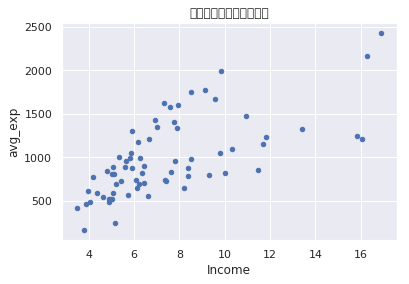

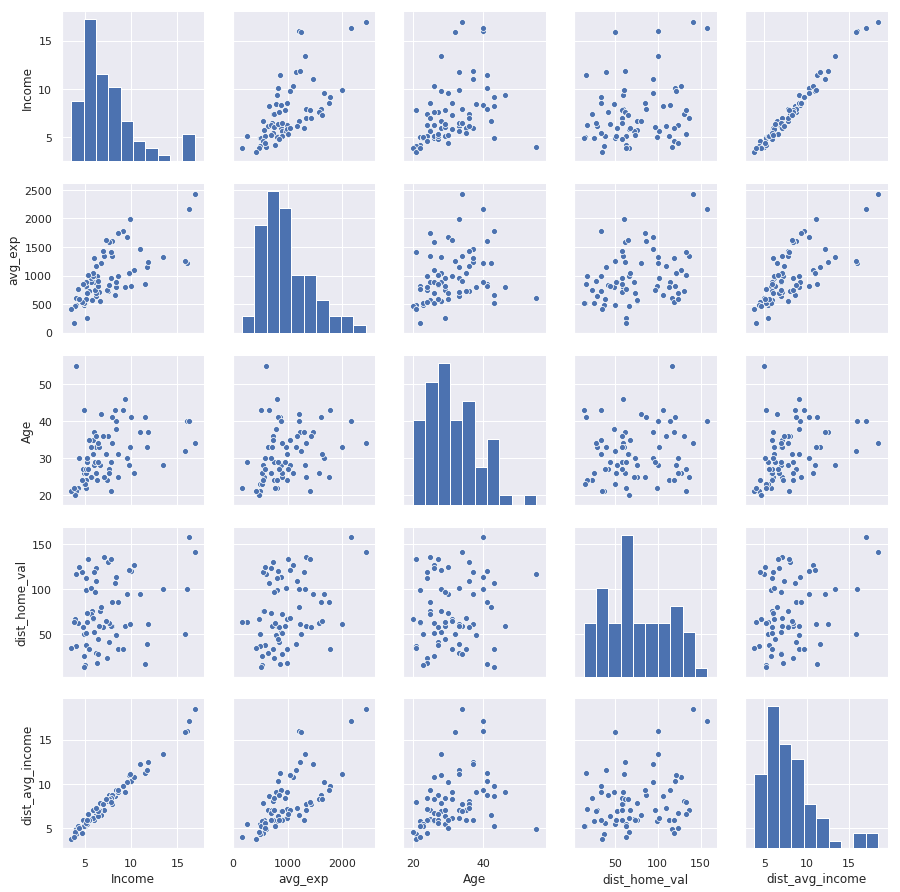

In [46]:
creditcard_exp  = pd.read_csv('creditcard_exp.csv',skipinitialspace = True)
#画图
import matplotlib.pyplot as plt

#解决中文显示问题
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['font.family']='sans-serif'
plt.rcParams['axes.unicode_minus'] = False

creditcard_exp.plot(x= 'Income',y='avg_exp',kind='scatter',title='收入与信用卡支出散点图')
plt.show()
#%%
#计算相关系数
print(creditcard_exp[['Income','avg_exp']].corr(method='pearson'))
print(creditcard_exp[['Income','avg_exp']].corr(method='spearman'))
print(creditcard_exp[['Income','avg_exp']].corr(method='kendall'))
#%%

#画散点图
import seaborn as sns
creditcard_exp1 = creditcard_exp.dropna()
sns.pairplot(creditcard_exp1[['Income','avg_exp','Age','dist_home_val','dist_avg_income']],size =2.5)
plt.show()

## 卡方检验
卡方检验主要检验的是两个分类变量是否相关,不能表示强弱

In [47]:
#列联表分析
#读取数据
accepts = pd.read_csv('accepts.csv')
cross_table = pd.crosstab(accepts.bankruptcy_ind,columns=accepts.bad_ind,margins=True)
cross_table_rowpct = cross_table.div(cross_table['All'],axis=0)

#卡方检验
stats.chi2_contingency(cross_table)

(2.9166670832184227,
 0.5718664217239144,
 4,
 array([[4149.15422886, 1030.84577114, 5180.        ],
        [ 358.84577114,   89.15422886,  448.        ],
        [4508.        , 1120.        , 5628.        ]]))

# 拟合和优化问题

![img/img1.png](img/img1.png)